## **1. Importing dependencies**

In [44]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import pickle

In [45]:
crop_data = pd.read_csv('Dataset/yield_df.csv')
crop_data.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [46]:
crop_data = crop_data.drop(columns=['Unnamed: 0'],axis = 1)

## **2. Label Encoding**

In [47]:
crop_data.shape

(28242, 7)

In [48]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [49]:
print(crop_data.isnull().sum())

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


In [50]:
categorical_column = crop_data.select_dtypes(include=[object]).columns
print(categorical_column)

Index(['Area', 'Item'], dtype='object')


In [51]:
print(crop_data['Area'].unique())
print(f"Unique values in area column are {len(crop_data['Area'].unique())}")

['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Canada' 'Central African Republic' 'Chile' 'Colombia' 'Croatia'
 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea'
 'Estonia' 'Finland' 'France' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'India' 'Indonesia' 'Iraq'
 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Kazakhstan' 'Kenya' 'Latvia'
 'Lebanon' 'Lesotho' 'Libya' 'Lithuania' 'Madagascar' 'Malawi' 'Malaysia'
 'Mali' 'Mauritania' 'Mauritius' 'Mexico' 'Montenegro' 'Morocco'
 'Mozambique' 'Namibia' 'Nepal' 'Netherlands' 'New Zealand' 'Nicaragua'
 'Niger' 'Norway' 'Pakistan' 'Papua New Guinea' 'Peru' 'Poland' 'Portugal'
 'Qatar' 'Romania' 'Rwanda' 'Saudi Arabia' 'Senegal' 'Slovenia'
 'South Africa' 'Spain' 'Sri Lanka' 'Sudan' 'Suriname' 'Sweden'
 'Switzerland' 'Tajikistan

In [52]:
print(crop_data['Item'].unique())
print(f"Unique values in Item column are {len(crop_data['Item'].unique())}")

['Maize' 'Potatoes' 'Rice, paddy' 'Sorghum' 'Soybeans' 'Wheat' 'Cassava'
 'Sweet potatoes' 'Plantains and others' 'Yams']
Unique values in Item column are 10


In [53]:
encoders = {}

for column in categorical_column:
    encoders[column] = LabelEncoder()
    crop_data[column] = encoders[column].fit_transform(crop_data[column])

with open('encoders.pkl','wb') as f:
    pickle.dump(encoders,f)

In [54]:
encoders

{'Area': LabelEncoder(), 'Item': LabelEncoder()}

In [55]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  int64  
 1   Item                           28242 non-null  int64  
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 1.5 MB


## **3. Finding correlation amoung features**

In [56]:
corr = crop_data.corr()

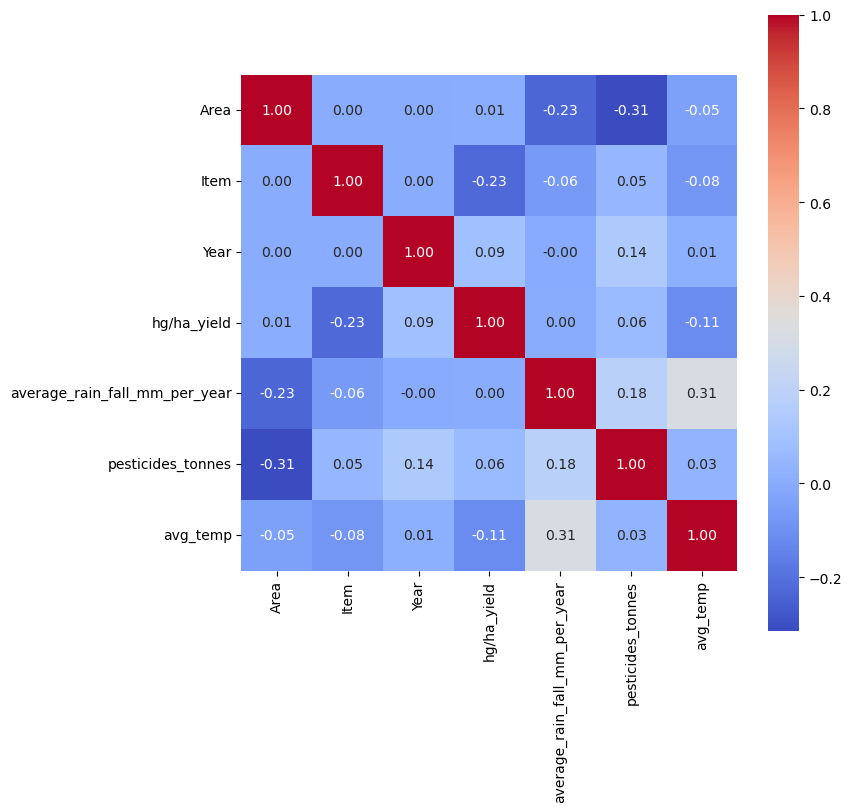

In [57]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,annot_kws={'size':10},square=True,fmt='.2f',cmap='coolwarm')
plt.show()
# We can clearly see that there is no relation amoung the features

## **4. Train test split**

In [58]:
features = crop_data.drop(columns=['hg/ha_yield'])
target = crop_data['hg/ha_yield']

In [59]:
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size=0.2,random_state=2)
print(features.shape,features_train.shape,features_test.shape)
print(target.shape,target_train.shape,target_test.shape)

(28242, 6) (22593, 6) (5649, 6)
(28242,) (22593,) (5649,)


## **5. Model Training and Testing**

In [60]:
models = {
    "Linear_Regression":LinearRegression(),
    "XGBRegressor":XGBRegressor(n_estimators=100,max_depth=3,learning_rate=0.1,subsample=0.8,colsample_bytree=0.8,n_jobs=-1),
    "Decision_Tree_Regressor":DecisionTreeRegressor(max_depth=5,min_samples_split=10,min_samples_leaf=5),
    "Random_Forest_Regressor":RandomForestRegressor(n_estimators=100,max_depth=10,min_samples_split=10,min_samples_leaf=5,random_state=42)
}

In [61]:
for model_name,model in models.items():
    model.fit(features_train,target_train)
    print(f"{model_name} training done!!!")

Linear_Regression training done!!!
XGBRegressor training done!!!
Decision_Tree_Regressor training done!!!
Random_Forest_Regressor training done!!!


## **6. Computing R Squared Error for training and testing data**

In [62]:
for model_name, model in models.items():
    training_prediction = model.predict(features_train)
    training_r2 = r2_score(target_train,training_prediction)
    print(f"R Squared Error of {model_name} on training dataset is {training_r2}")

R Squared Error of Linear_Regression on training dataset is 0.08487742731887005
R Squared Error of XGBRegressor on training dataset is 0.8292639851570129
R Squared Error of Decision_Tree_Regressor on training dataset is 0.7733068202825305
R Squared Error of Random_Forest_Regressor on training dataset is 0.9767662442608609


In [63]:
for model_name, model in models.items():
    testing_prediction = model.predict(features_test)
    testing_r2 = r2_score(target_test,testing_prediction)
    print(f"R Squared Error of {model_name} on testing dataset is {testing_r2}")

R Squared Error of Linear_Regression on testing dataset is 0.07380662421885642
R Squared Error of XGBRegressor on testing dataset is 0.8263530135154724
R Squared Error of Decision_Tree_Regressor on testing dataset is 0.7635086389525998
R Squared Error of Random_Forest_Regressor on testing dataset is 0.9676605637078606


## **7. Buildng a predictive model**

In [72]:
def prediction(input_data):
    input_data = np.array(input_data, dtype=object)
    input_data[0] = encoders['Area'].transform([input_data[0]])[0]
    input_data[1] = encoders['Item'].transform([input_data[1]])[0]
    input_data = input_data.reshape(1, -1)
    for model_name, model in models.items():
        prediction = model.predict(input_data)
        print(f"Prediction of {model_name} is {prediction}.")
    print("-"*80)
        
prediction(['Albania','Maize',1990,1485.0,121.0,16.37]) #36613
prediction(['Algeria','Maize',2001,89.0,710.11,18.13]) #27175
prediction(['Angola','Cassava',1992,1010.0,23.0,23.96]) #42295
prediction(['Argentina','Rice, paddy',1991,591.0,26156.0,17.64]) #40294

Prediction of Linear_Regression is [93273.83063198].
Prediction of XGBRegressor is [5468.0757].
Prediction of Decision_Tree_Regressor is [28317.25240848].
Prediction of Random_Forest_Regressor is [28934.01209859].
--------------------------------------------------------------------------------
Prediction of Linear_Regression is [97336.58400731].
Prediction of XGBRegressor is [30390.855].
Prediction of Decision_Tree_Regressor is [28317.25240848].
Prediction of Random_Forest_Regressor is [23540.10365243].
--------------------------------------------------------------------------------
Prediction of Linear_Regression is [87146.48570666].
Prediction of XGBRegressor is [67426.95].
Prediction of Decision_Tree_Regressor is [85299.4914966].
Prediction of Random_Forest_Regressor is [44510.36129686].
--------------------------------------------------------------------------------
Prediction of Linear_Regression is [68957.01027849].
Prediction of XGBRegressor is [48327.125].
Prediction of Decisio

E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning